In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

### Reception du bruit

In [4]:
time = 5
f = 44100
recording = sd.rec(time * f, samplerate=f,channels=1)
sd.wait()

### Visualisation

(1.0, 1.01060192473242)

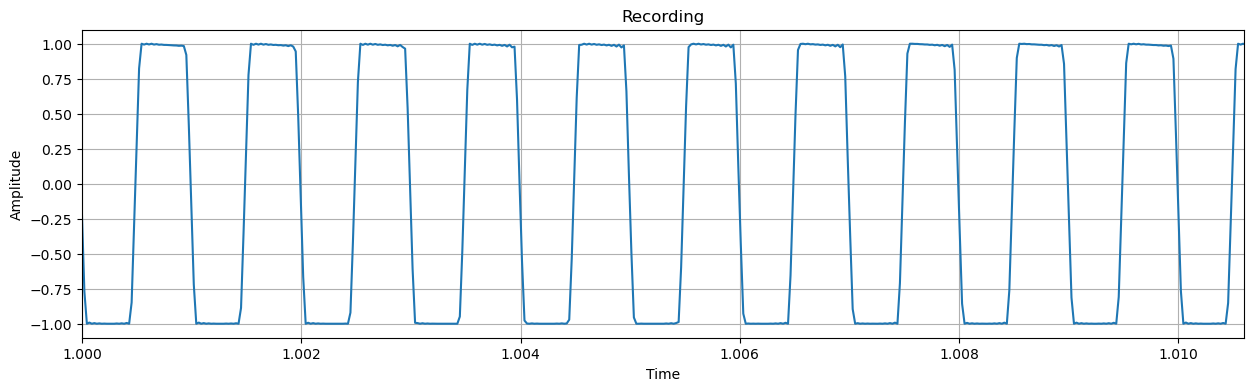

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
t = np.linspace(0, time, int(f * time), endpoint=False)
ax.plot(t,recording)
ax.set_title('Recording')
ax.set_xlabel("Time")
ax.grid(True)
ax.set_ylabel("Amplitude")
ax.set_xlim(1,1.01060192473242)


In [16]:
x=0
for i in range(len(recording)-1):
    if recording[i] > 0:
        if recording[i+1] < 0:
            x+=1
    elif recording[i] < 0:
        if recording[i+1] >0:
            x+=1
x/=2
Te=1/f
fi = x/time
print(fi)
amplitude = (max(recording)+abs(min(recording)))/2
#amplitude*=2
print("L'amplitude max est de :",amplitude)




999.8
L'amplitude max est de : [0.99998474]
